### New York City Dataset Cleaning and Exploration
The purpose of this notebook is to:
 * clean the dataset
 * Find basic information
 * Do some basic exploration and visualization
 * Might be worth considering just NYC
 * Should we have a year cut off?
 * Ask about bail set amounts and that there are multiple

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Upload Dataset

df = pd.read_csv("/content/PretrialReleaseDataExtractWeb.csv")
df.shape

FileNotFoundError: ignored

In [ ]:
df.describe()

,Age_at_Crime,Age_at_Arrest,App_Count_Arraign_to_Dispo_Released,App_Count_Arraign_to_Dispo_Detained,App_Count_Arraign_to_Dispo_Total,Num_of_ROW,Days_Arraign_Remand_First_Released,Known_Days_in_Custody,Days_Arraign_Bail_Set_to_First_Posted,Days_Arraign_Bail_Set_to_First_Release,Days_Arraign_to_Dispo,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest_firearm,arr_cycle_id
count,284096.000000,284096.000000,284096.000000,284096.000000,284096.000000,284096.000000,6659.000000,284096.000000,12314.000000,35968.000000,224316.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,235933.000000
mean,35.193185,34.948334,3.161713,0.612353,3.774066,0.069160,37.961406,11.815302,14.441936,41.888679,114.048877,0.201926,0.478294,1.972682,0.083039,0.178116,0.237474,0.091464,0.007317,351409.914255
std,11.876270,12.336724,3.006000,1.703410,3.221497,0.326338,66.781975,52.189276,38.888718,73.820571,119.521512,0.485111,0.959980,3.110412,0.275942,0.382611,0.425536,0.288269,0.085227,68352.132232
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235934.000000
25%,26.000000,26.000000,1.000000,0.000000,2.000000,0.000000,5.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,291760.000000
50%,33.000000,33.000000,2.000000,0.000000,3.000000,0.000000,7.000000,0.000000,2.000000,7.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350281.000000
75%,42.000000,42.000000,4.000000,0.000000,5.000000,0.000000,38.000000,0.000000,8.000000,46.000000,178.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,410404.000000
max,93.000000,93.000000,61.000000,61.000000,72.000000,8.000000,586.000000,12161.000000,543.000000,583.000000,611.000000,2.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,471866.000000


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
for col in df.columns:
    print(col)

Internal_Case_ID
Gender
Race
Ethnicity
Age_at_Crime
Age_at_Arrest
Court_Name
Court_ORI
County_Name
District
Region
Court_Type
Judge_Name
Offense_Date
Arrest_Date
Arrest_Type
Top_Arrest_Law
Top_Arrest_Article_Section
Top_Arrest_Attempt_Indicator
Top_Charge_at_Arrest
Top_Charge_Severity_at_Arrest
Top_Charge_Weight_at_Arrest
Top_Charge_at_Arrest_Violent_Felony_Ind
Case_Type
First_Arraign_Date
Top_Arraign_Law
Top_Arraign_Article_Section
Top_Arraign_Attempt_Indicator
Top_Charge_at_Arraign
Top_Severity_at_Arraign
Top_Charge_Weight_at_Arraign
Top_Charge_at_Arraign_Violent_Felony_Ind
Arraign Charge Category
Representation_Type
App_Count_Arraign_to_Dispo_Released
App_Count_Arraign_to_Dispo_Detained
App_Count_Arraign_to_Dispo_Total
Def_Attended_Sched_Pretrials
Remanded_to_Jail_at_Arraign
ROR_at_Arraign
Bail_Set_and_Posted_at_Arraign
Bail_Set_and_Not_Posted_at_Arraign
NMR_at_Arraign
Release Decision at Arraign
Representation_at_Securing_Order
Pretrial_Supervision_at_Arraign
Contact_Pretrial_Servi

108 columns let's review to see if all are important to our project.
Website documenting columns <https://www.nycourts.gov/legacypdfs/court-research/PretrialReleaseDataDictionaryWeb.pdf>
Looking at the documentation, all the columns seem valid and important.  In order to more easily clean and examine the dataset I am going to break the dataset into several sub dataset using the same grouping as the documentation.

1. Defendent Demographics
  * Gender
  * Race
  * Ethnicity
  * Age at Crime
  * Age at Arrest

In [ ]:
defendent_demographic = df[['Internal_Case_ID', 'Gender', 'Race', 'Ethnicity', 'Age_at_Crime', 'Age_at_Arrest']].copy()
defendent_demographic.info()
#print("the average age at the time of the crime is", defendent_demographic['Age_at_Crime'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Internal_Case_ID  284096 non-null  object 
 1   Gender            284096 non-null  object 
 2   Race              284096 non-null  object 
 3   Ethnicity         284096 non-null  object 
 4   Age_at_Crime      284096 non-null  float64
 5   Age_at_Arrest     284096 non-null  float64
dtypes: float64(2), object(4)
memory usage: 13.0+ MB


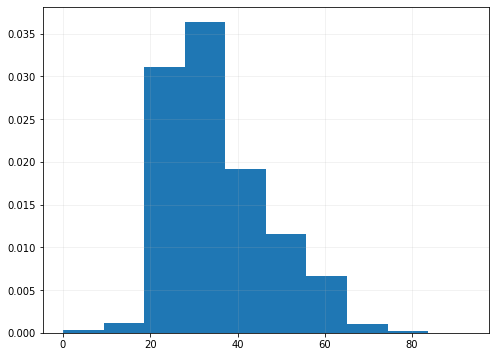

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.hist(defendent_demographic['Age_at_Crime'], bins=10, density=True)
plt.grid(alpha=0.2)
plt.show()

In [ ]:

#defendent_demographic.info()

In [ ]:
#defendent_demographic.describe()

In [ ]:
#weird that zero is an option
print(defendent_demographic['Age_at_Crime'].value_counts(ascending=True))
print(defendent_demographic['Age_at_Arrest'].value_counts(ascending=True))


13.0        1
92.0        1
15.0        2
90.0        2
93.0        3
        ...  
26.0    10625
27.0    10814
30.0    10908
28.0    10979
29.0    11146
Name: Age_at_Crime, Length: 81, dtype: int64
92.0        1
90.0        2
93.0        3
89.0        4
88.0        5
        ...  
26.0    10468
27.0    10632
28.0    10817
30.0    10884
29.0    10977
Name: Age_at_Arrest, Length: 77, dtype: int64


In [ ]:
#Number of Zeros in Each Column
print(sum(defendent_demographic['Age_at_Crime'] == 0.0))
print(sum(defendent_demographic['Age_at_Arrest'] == 0.0))

744
3572


In [ ]:
#Replace the zero with NAN
defendent_demographic = defendent_demographic.replace(0.0, np.nan)

In [ ]:
#Let's Look at the other columns
print(defendent_demographic['Gender'].value_counts(ascending=True))
print(defendent_demographic['Race'].value_counts(ascending=True))
print(defendent_demographic['Ethnicity'].value_counts(ascending=True))

Unknown      1064
Female      57388
Male       225644
Name: Gender, dtype: int64
American Indian/Alaskan Native       149
Asian/Pacific Islander               300
Other                                636
Unknown                            63304
White                             100539
Black                             119168
Name: Race, dtype: int64
Unknown          58633
Hispanic         59714
Non Hispanic    165749
Name: Ethnicity, dtype: int64


In [ ]:
# <insert some exploration here>
# Want to normalize the graphs on race

2. Court Information
  * Court Name
  * Court ORI
  * County Name
  * District
  * Region
  * Court Type
  * Judge Name

In [ ]:
court_info = df[['Court_Name', 'Court_ORI', 'County_Name', 'District', 'Region', 'Court_Type', 'Judge_Name']].copy()
#court_info.head(20)

In [ ]:
court_info.info()
court_info.head()
#court_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Court_Name   284096 non-null  object
 1   Court_ORI    284096 non-null  object
 2   County_Name  284096 non-null  object
 3   District     284096 non-null  object
 4   Region       284096 non-null  object
 5   Court_Type   284096 non-null  object
 6   Judge_Name   284096 non-null  object
dtypes: object(7)
memory usage: 15.2+ MB


,Court_Name,Court_ORI,County_Name,District,Region,Court_Type,Judge_Name
0,Queens Criminal Court,NY040033J,Queens,District 11,NYC,Local,"Novillo, Edwin I."
1,New York Criminal Court,NY030033J,New York,District 1,NYC,Local,"Clynes, James G."
2,Syracuse City Court,NY033011J,Onondaga,District 5,ONYC,Local,"Limpert, Theodore H."
3,Rome City Court,NY032011J,Oneida,District 5,ONYC,Local,"Amoroso, Gregory J."
4,New York Criminal Court,NY030033J,New York,District 1,NYC,Local,"Thompson, Ann D."


In [ ]:
#Check out the columns in details
#print(court_info['Court_Name'].value_counts(ascending=True))
#print(court_info['Court_ORI'].value_counts(ascending=True))
#print(court_info['County_Name'].value_counts(ascending=True))
#print(court_info['District'].value_counts(ascending=True))
#print(court_info['Region'].value_counts(ascending=True))  #NYC or ONYC
print(court_info['Court_Type'].value_counts(ascending=True)) #All say local



Local    284096
Name: Court_Type, dtype: int64


3. Arrest
  * Offense Date
  * Arrest Date
  * Arrest Type
  * Top Arrest Law
  * Top Arrest Article Section
  * Top Arrest Attempt Indicator 
  * Top Charge at Arrest
  * Top Charge Severity at Arrest
  * Top Charge Weight at Arrest
  * Top Charge at Arrest Violent
  * Felony Ind

In [ ]:
arrest = df[['Offense_Date', 'Arrest_Date', 'Arrest_Type', 'Top_Arrest_Law',
             'Top_Arrest_Article_Section', 'Top_Arrest_Attempt_Indicator', 'Top_Charge_at_Arrest',
             'Top_Charge_Severity_at_Arrest', 'Top_Charge_Weight_at_Arrest', 'Top_Charge_at_Arrest_Violent_Felony_Ind']].copy()
arrest.head()
#arrest.info()

,Offense_Date,Arrest_Date,Arrest_Type,Top_Arrest_Law,Top_Arrest_Article_Section,Top_Arrest_Attempt_Indicator,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind
0,NaN,NaN,Custody,NaN,NaN,,NaN,NaN,NaN,N
1,11/1/2019,11/1/2019,DAT,PL,120,,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N
2,4/1/2017,4/1/2017,DAT,VTL,511,,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N
3,4/1/2017,4/1/2017,Custody,VTL,511,,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N
4,1/1/2020,1/1/2020,Custody,PL,155.25,,PL 155.25 AM Petit Larceny,Misdemeanor,AM,N


In [ ]:
#make the strings into datetime
arrest['Offense_Date']= pd.to_datetime(arrest['Offense_Date'])
arrest['Arrest_Date']= pd.to_datetime(arrest['Arrest_Date'])

arrest.head()

,Offense_Date,Arrest_Date,Arrest_Type,Top_Arrest_Law,Top_Arrest_Article_Section,Top_Arrest_Attempt_Indicator,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind
0,NaT,NaT,Custody,NaN,NaN,,NaN,NaN,NaN,N
1,2019-11-01,2019-11-01,DAT,PL,120,,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N
2,2017-04-01,2017-04-01,DAT,VTL,511,,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N
3,2017-04-01,2017-04-01,Custody,VTL,511,,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N
4,2020-01-01,2020-01-01,Custody,PL,155.25,,PL 155.25 AM Petit Larceny,Misdemeanor,AM,N


In [ ]:
arrest.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Offense_Date,Arrest_Date,Arrest_Type,Top_Arrest_Law,Top_Arrest_Article_Section,Top_Arrest_Attempt_Indicator,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind
count,282689,279762,284096,282780,282775,284096,282780,282774,282774,284096
unique,285,264,2,59,668,2,1625,4,10,2
top,2020-01-01 00:00:00,2020-01-01 00:00:00,Custody,PL,120,,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N
freq,20543,20907,189194,219804,37598,279912,33011,202043,140607,251436
first,1978-02-01 00:00:00,1982-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-06-01 00:00:00,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# <insert visuals here>
pd.to_datetime(arrest['Arrest_Date']).dt.year.value_counts()

2020.0    181993
2021.0     79203
2019.0     14331
2018.0      1927
2017.0       976
2016.0       499
2015.0       231
2014.0       123
2013.0       104
2012.0        67
2010.0        53
2011.0        49
2008.0        38
2007.0        25
2006.0        19
2009.0        18
2004.0        14
2005.0        11
1994.0        10
2003.0         9
2001.0         8
1996.0         8
1993.0         7
2000.0         7
2002.0         6
1997.0         5
1998.0         5
1991.0         4
1995.0         3
1982.0         2
1988.0         2
1983.0         1
1989.0         1
1986.0         1
1987.0         1
1992.0         1
Name: Arrest_Date, dtype: int64

In [ ]:
#Offense Date Counts
pd.to_datetime(arrest['Offense_Date']).dt.year.value_counts()

2020.0    181371
2021.0     70857
2019.0     23224
2018.0      3002
2017.0      1489
2016.0       837
2015.0       501
2014.0       305
2013.0       199
2012.0       182
2011.0       150
2010.0       138
2008.0        88
2009.0        77
2007.0        68
2006.0        47
2005.0        24
2004.0        18
2001.0        14
2003.0        12
2002.0        10
1994.0        10
2000.0        10
1993.0         9
1998.0         9
1996.0         8
1997.0         7
1995.0         4
1999.0         4
1991.0         4
1989.0         1
1987.0         1
1988.0         1
1978.0         1
1980.0         1
1979.0         1
1983.0         1
1984.0         1
1982.0         1
1986.0         1
1992.0         1
Name: Offense_Date, dtype: int64

4. Case Information
  * Case_Type
  * First_Arraign_Date

In [ ]:
case_info = df[['Case_Type', 'First_Arraign_Date']].copy()
case_info.head()

,Case_Type,First_Arraign_Date
0,Docket,4/1/2021
1,Docket,1/1/2020
2,Docket,2/1/2020
3,Docket,9/1/2020
4,Docket,1/1/2020


In [ ]:
#change string date to datetime
case_info['First_Arraign_Date']= pd.to_datetime(case_info['First_Arraign_Date'])
case_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Case_Type           284096 non-null  object        
 1   First_Arraign_Date  284096 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.3+ MB


In [ ]:
pd.to_datetime(case_info['First_Arraign_Date']).dt.year.value_counts()
case_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Case_Type           284096 non-null  object        
 1   First_Arraign_Date  284096 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.3+ MB


In [ ]:
#<insert visuals here?>

5. Arraignment Charge
  * Top_Arraign_Law
  * Top_Arraign_Article Section
  * Top Arraign Attempt Indicator #only 1 value
  * Top Charge at Arraign
  * Top Severity at Arraign
  * Top Charge Weight at Arraign
  * Top Charge at Arraign Violent Felony Ind
  * Arraign Charge Category



In [ ]:
arraignment_charge = df[['Top_Arraign_Law', 'Top_Arraign_Article_Section', 
                         'Top_Arraign_Attempt_Indicator', 'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign',
                         'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind',
                         'Arraign Charge Category']].copy()
#arraignment_charge.tail(20)

In [ ]:
arraignment_charge.info()
arraignment_charge.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 8 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Top_Arraign_Law                           284096 non-null  object
 1   Top_Arraign_Article_Section               284091 non-null  object
 2   Top_Arraign_Attempt_Indicator             4267 non-null    object
 3   Top_Charge_at_Arraign                     284096 non-null  object
 4   Top_Severity_at_Arraign                   284096 non-null  object
 5   Top_Charge_Weight_at_Arraign              284096 non-null  object
 6   Top_Charge_at_Arraign_Violent_Felony_Ind  284096 non-null  object
 7   Arraign Charge Category                   284096 non-null  object
dtypes: object(8)
memory usage: 17.3+ MB


,Top_Arraign_Law,Top_Arraign_Article_Section,Top_Arraign_Attempt_Indicator,Top_Charge_at_Arraign,Top_Severity_at_Arraign,Top_Charge_Weight_at_Arraign,Top_Charge_at_Arraign_Violent_Felony_Ind,Arraign Charge Category
count,284096,284091,4267,284096,284096,284096,284096,284096
unique,57,599,1,1510,2,8,2,20
top,PL,120,Attempt,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N,Assault
freq,222637,37910,4267,33286,203691,143022,251154,59770


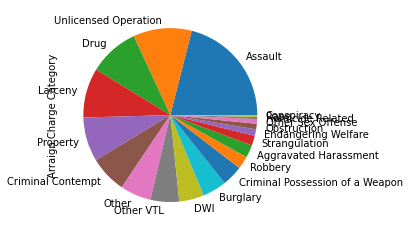

In [ ]:
arraignment_charge['Arraign Charge Category'].value_counts().plot(kind='pie')

6. Court Appearance
  * Representation Type
  * App Count Arraign to Dispo Released
  * App Count Arraign to Dispo Detained
  * App Count Arraign to Dispo Total
  * Def Attended Sched Pretrials 
  * Remanded to Jail at Arraign
  * ROR at Arraign 
  * Bail Set and Posted at Arraign
  * Bail Set and Not Posted at Arraign
  * NMR at Arraign
  * Release Decision at Arraign
  * Representation at Securing Order

** Need to decide if we want to just look at bail set

In [ ]:
court_appearance = df[['Representation_Type', 'App_Count_Arraign_to_Dispo_Released', 
                       'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 'Def_Attended_Sched_Pretrials',
                       'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign',
                       'NMR_at_Arraign', 'Release Decision at Arraign', 'Representation_at_Securing_Order']].copy()
court_appearance.tail(10)

,Representation_Type,App_Count_Arraign_to_Dispo_Released,App_Count_Arraign_to_Dispo_Detained,App_Count_Arraign_to_Dispo_Total,Def_Attended_Sched_Pretrials,Remanded_to_Jail_at_Arraign,ROR_at_Arraign,Bail_Set_and_Posted_at_Arraign,Bail_Set_and_Not_Posted_at_Arraign,NMR_at_Arraign,Release Decision at Arraign,Representation_at_Securing_Order
284088,Legal Aid,0.0,5.0,5.0,1,N,N,N,Y,N,Bail-set,Y
284089,Legal Aid,1.0,0.0,1.0,1,N,N,N,N,N,Disposed at arraign,Y
284090,Public Defender,1.0,0.0,1.0,1,N,N,N,N,Y,Nonmonetary release,Y
284091,Legal Aid,1.0,1.0,2.0,2,N,N,N,Y,N,Bail-set,Y
284092,NaN,1.0,0.0,1.0,1,N,Y,N,N,N,Disposed at arraign,N
284093,Legal Aid,1.0,0.0,1.0,1,N,Y,N,N,N,ROR,Y
284094,Retained Attorney,2.0,0.0,2.0,2,N,Y,N,N,N,ROR,Y
284095,Legal Aid,2.0,0.0,2.0,2,N,Y,N,N,N,ROR,Y
284096,Legal Aid,4.0,0.0,4.0,4,N,Y,N,N,N,ROR,Y
284097,18B (Assigned Counsel),3.0,0.0,3.0,1,N,Y,N,N,N,ROR,Y


In [ ]:
court_appearance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Representation_Type                  267284 non-null  object 
 1   App_Count_Arraign_to_Dispo_Released  284096 non-null  float64
 2   App_Count_Arraign_to_Dispo_Detained  284096 non-null  float64
 3   App_Count_Arraign_to_Dispo_Total     284096 non-null  float64
 4   Def_Attended_Sched_Pretrials         284096 non-null  object 
 5   Remanded_to_Jail_at_Arraign          284096 non-null  object 
 6   ROR_at_Arraign                       284096 non-null  object 
 7   Bail_Set_and_Posted_at_Arraign       284096 non-null  object 
 8   Bail_Set_and_Not_Posted_at_Arraign   284096 non-null  object 
 9   NMR_at_Arraign                       284096 non-null  object 
 10  Release Decision at Arraign          284096 non-null  object 
 11  Representatio

In [ ]:
court_appearance.describe()

,App_Count_Arraign_to_Dispo_Released,App_Count_Arraign_to_Dispo_Detained,App_Count_Arraign_to_Dispo_Total
count,284096.000000,284096.000000,284096.000000
mean,3.161713,0.612353,3.774066
std,3.006000,1.703410,3.221497
min,-2.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000
50%,2.000000,0.000000,3.000000
75%,4.000000,0.000000,5.000000
max,61.000000,61.000000,72.000000


7. Nonmonetary Release Conditions at Arraignment
  * Pretrial Supervision at Arraign
  * Contact Pretrial Service Agency
  * Electronic Monitoring 
  * Travel Restrictions
  * Passport Surrender
  * No Firearms or Weapons 
  * Maintain Employment 
  * Maintain Housing 
  * Maintain School 
  * Placement in Mandatory Program
  * Removal to Hospital 
  * Obey Order of Protection
  * Obey Court Conditions-Family Offense
  * Other NMR 

  ** Consider Turning Y and N into 1 and 0 for ML purposes**

In [ ]:
NMR_release_conditions = df[['Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 
                         'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender',
                         'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School',
                         'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
                         'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR']].copy()
NMR_release_conditions.tail(20)

,Pretrial_Supervision_at_Arraign,Contact_Pretrial_Service_Agency,Electronic_Monitoring,Travel_Restrictions,Passport_Surrender,No_Firearms_or_Weapons,Maintain_Employment,Maintain_Housing,Maintain_School,Placement_in_Mandatory_Program,Removal_to_Hospital,Obey_Order_of_Protection,Obey_Court_Conditions-Family_Offense,Other_NMR
284078,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284079,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284080,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284081,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284082,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284083,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284084,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284085,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284086,N,N,N,N,N,N,N,N,N,N,N,N,N,N
284087,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [ ]:
NMR_release_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Pretrial_Supervision_at_Arraign       284096 non-null  object
 1   Contact_Pretrial_Service_Agency       284096 non-null  object
 2   Electronic_Monitoring                 284096 non-null  object
 3   Travel_Restrictions                   284096 non-null  object
 4   Passport_Surrender                    284096 non-null  object
 5   No_Firearms_or_Weapons                284096 non-null  object
 6   Maintain_Employment                   284096 non-null  object
 7   Maintain_Housing                      284096 non-null  object
 8   Maintain_School                       284096 non-null  object
 9   Placement_in_Mandatory_Program        284096 non-null  object
 10  Removal_to_Hospital                   284096 non-null  object
 11  Obey_Order_of

In [ ]:
#Let's see if you can have multiple NMR
columns = ['Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 
                         'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender',
                         'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School',
                         'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
                         'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR']
NMR_release_conditions['Count'] = (NMR_release_conditions[columns] == 'Y').sum(axis=1)

In [ ]:
print(NMR_release_conditions['Count'].value_counts(ascending=True))
#You can have multiple NMR restrictions

7         1
5        13
4       124
3      1188
2      4011
1     21412
0    257349
Name: Count, dtype: int64


8. Domestic Violence
 * Order of Protection

In [ ]:
domestic_violence = df[['Order_of_Protection']].copy()
domestic_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Order_of_Protection  108465 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


9. Bail
  * First Bail Set Cash
  * First Bail Set Credit
  * First Insurance Company Bail Bond 
  * First Secured Surety Bond
  * First Secured App Bond
  * First Unsecured Surety Bond 
  * First Unsecured App Bond
  * First Partially Secured Surety Bond
  * Partially Secured Surety Bond Perc 
  * First Partially Secured App Bond 
  * Partially Secured App Bond Perc
  * Bail Made Indicator


  *May want to look at rows with either bail or NMR

In [ ]:
bail = df[['First_Bail_Set_Cash', 'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
          'First_Secured_Surety_Bond', 'First_Unsecured_App_Bond', 'First_Partially_Secured_Surety_Bond',
          'Partially_Secured_Surety_Bond_Perc', 'First_Partially_Secured_App_Bond', 'Partially_Secured_App_Bond_Perc',
          'Bail_Made_Indicator']].copy()
bail.tail(10)

,First_Bail_Set_Cash,First_Bail_Set_Credit,First_Insurance_Company_Bail_Bond,First_Secured_Surety_Bond,First_Unsecured_App_Bond,First_Partially_Secured_Surety_Bond,Partially_Secured_Surety_Bond_Perc,First_Partially_Secured_App_Bond,Partially_Secured_App_Bond_Perc,Bail_Made_Indicator
284088,25000,,50000,,,250000,10,,,NaN
284089,,,,,,,,,,NaN
284090,,,,,,,,,,NaN
284091,2500,2500,5000,,,7500,10,,,Credit
284092,,,,,,,,,,NaN
284093,,,,,,,,,,NaN
284094,,,,,,,,,,NaN
284095,,,,,,,,,,NaN
284096,,,,,,,,,,NaN
284097,,,,,,,,,,NaN


In [ ]:
#make empty string into nan
bail = bail.replace(' ', np.nan)
bail.tail(10)

,First_Bail_Set_Cash,First_Bail_Set_Credit,First_Insurance_Company_Bail_Bond,First_Secured_Surety_Bond,First_Unsecured_App_Bond,First_Partially_Secured_Surety_Bond,Partially_Secured_Surety_Bond_Perc,First_Partially_Secured_App_Bond,Partially_Secured_App_Bond_Perc,Bail_Made_Indicator
284088,25000,NaN,50000,NaN,NaN,250000,10,NaN,NaN,NaN
284089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284091,2500,2500,5000,NaN,NaN,7500,10,NaN,NaN,Credit
284092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bail["First_Bail_Set_Cash"] = bail["First_Bail_Set_Cash"].astype(str).astype(float)
bail["First_Bail_Set_Credit"] = bail["First_Bail_Set_Credit"].astype(str).astype(float)
bail["First_Insurance_Company_Bail_Bond"] = bail["First_Insurance_Company_Bail_Bond"].astype(str).astype(float)
bail["First_Secured_Surety_Bond"] = bail["First_Secured_Surety_Bond"].astype(str).astype(float)
bail["First_Unsecured_App_Bond"] = bail["First_Unsecured_App_Bond"].astype(str).astype(float)
bail["First_Partially_Secured_Surety_Bond"] = bail["First_Partially_Secured_Surety_Bond"].astype(str).astype(float)
bail["Partially_Secured_Surety_Bond_Perc"] = bail["Partially_Secured_Surety_Bond_Perc"].astype(str).astype(float)
bail["First_Partially_Secured_App_Bond"] = bail["First_Partially_Secured_App_Bond"].astype(str).astype(float)
bail["Partially_Secured_App_Bond_Perc"] = bail["Partially_Secured_App_Bond_Perc"].astype(str).astype(float)

In [ ]:
bail['Bail_Made_Indicator'].unique()

array([nan, 'Credit', 'Cash', 'Bond'], dtype=object)

In [ ]:
print("Mean average of cash bail", bail['First_Bail_Set_Cash'].mean())
print("Mean average of credit bail", bail['First_Bail_Set_Credit'].mean())

Mean average of cash bail 18267.93284712259
Mean average of credit bail 15193.967760396796


10. Bench Warrant
  * Warrant Ordered btw Arraign and Dispo
  * DAT WO WS Prior to Arriagn
  * First Bench Warrant Date
  * Non Stayed WO
  * Num of Stayed WO
  * Num of ROW

In [ ]:
bench_warrant = df[['Warrant_Ordered_btw_Arraign_and_Dispo',
                    'DAT_WO_WS_Prior_to_Arraign','First_Bench_Warrant_Date','Non_Stayed_WO',
                    'Num_of_Stayed_WO','Num_of_ROW']].copy()

In [ ]:
bench_warrant.head()

,Warrant_Ordered_btw_Arraign_and_Dispo,DAT_WO_WS_Prior_to_Arraign,First_Bench_Warrant_Date,Non_Stayed_WO,Num_of_Stayed_WO,Num_of_ROW
0,N,N,,,,0.0
1,N,N,,,,0.0
2,N,N,,,,0.0
3,N,N,,,,0.0
4,Y,N,2/1/2020,1,1,1.0


In [ ]:
bench_warrant = bench_warrant.replace(' ', np.nan)
bench_warrant['First_Bench_Warrant_Date'] = pd.to_datetime(bench_warrant['First_Bench_Warrant_Date'])
bench_warrant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 6 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Warrant_Ordered_btw_Arraign_and_Dispo  284096 non-null  object        
 1   DAT_WO_WS_Prior_to_Arraign             284096 non-null  object        
 2   First_Bench_Warrant_Date               24602 non-null   datetime64[ns]
 3   Non_Stayed_WO                          22756 non-null   object        
 4   Num_of_Stayed_WO                       12516 non-null   object        
 5   Num_of_ROW                             284096 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 13.0+ MB


11. Disposition/Sentence
 * Docket Status
 * Disposition Type
 * Disposition Detail 
 * Dismissal Reason
 * Disposition Date
 * Most Severe Sentence
 * Top Conviction Law
 * Top Conviction Article Section
 * Top Conviction Attempt Indicator
 * Top Charge at Conviction
 * Top Charge Weight at Conviction
 * Top Charge Severity at Conviction
 * Top Charge at Conviction Violent Felony Ind

In [ ]:
dispo_sentence = df[['Docket_Status', 'Disposition_Type',
                     'Disposition_Detail', 'Dismissal_Reason','Disposition_Date','Most_Severe_Sentence', 'Top_Conviction_Law',
                     'Top_Conviction_Article_Section', 'Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction',
                     'Top_Charge_Severity_at_Conviction','Top_Charge_Weight_at_Conviction','Top_Charge_at_Conviction_Violent_Felony_Ind' ]].copy()


In [ ]:
dispo_sentence.head()

,Docket_Status,Disposition_Type,Disposition_Detail,Dismissal_Reason,Disposition_Date,Most_Severe_Sentence,Top_Conviction_Law,Top_Conviction_Article_Section,Top_Conviction_Attempt_Indicator,Top_Charge_at_Conviction,Top_Charge_Severity_at_Conviction,Top_Charge_Weight_at_Conviction,Top_Charge_at_Conviction_Violent_Felony_Ind
0,Disposed,Dismissed,Dismissed,Motion to Dismiss Granted,7/1/2021,NaN,NaN,NaN,,NaN,NaN,NaN,N
1,Disposed,Dism-ACD,ACD,ACD,2/1/2020,NaN,NaN,NaN,,NaN,NaN,NaN,N
2,Disposed,Dismissed,Dismissed,Motion to Dismiss Granted,9/1/2020,NaN,NaN,NaN,,NaN,NaN,NaN,N
3,Disposed,Plea,,,9/1/2020,NaN,VTL,509,,VTL 0509 01 I MV License Viol:No License,Infraction,I,N
4,Disposed,Plea,Pled Guilty,,3/1/2020,Imprisonment,PL,155.25,,PL 155.25 AM Petit Larceny,Misdemeanor,AM,N


In [ ]:
dispo_sentence = dispo_sentence.replace(' ', np.nan)
dispo_sentence['Disposition_Date']= pd.to_datetime(dispo_sentence['Disposition_Date'])
dispo_sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 13 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Docket_Status                                284096 non-null  object        
 1   Disposition_Type                             225829 non-null  object        
 2   Disposition_Detail                           225560 non-null  object        
 3   Dismissal_Reason                             97070 non-null   object        
 4   Disposition_Date                             224316 non-null  datetime64[ns]
 5   Most_Severe_Sentence                         73143 non-null   object        
 6   Top_Conviction_Law                           77552 non-null   object        
 7   Top_Conviction_Article_Section               77552 non-null   object        
 8   Top_Conviction_Attempt_Indicator             978 non-null     ob

12. Calculated Days
 * Days Arraign Remand First Release
 * Known Days in Custody
 * Days Arraign Bail Set to First Posted
 * Days Arraign Bail Set to First Release
 * Days Arraign to Dispo

In [ ]:
calc_day = df[['Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody', 'Days_Arraign_Bail_Set_to_First_Posted',
               'Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo']].copy()
calc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 5 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Days_Arraign_Remand_First_Released      6659 non-null    float64
 1   Known_Days_in_Custody                   284096 non-null  float64
 2   Days_Arraign_Bail_Set_to_First_Posted   12314 non-null   float64
 3   Days_Arraign_Bail_Set_to_First_Release  35968 non-null   float64
 4   Days_Arraign_to_Dispo                   224316 non-null  float64
dtypes: float64(5)
memory usage: 10.8 MB


In [ ]:
calc_day.describe()

,Days_Arraign_Remand_First_Released,Known_Days_in_Custody,Days_Arraign_Bail_Set_to_First_Posted,Days_Arraign_Bail_Set_to_First_Release,Days_Arraign_to_Dispo
count,6659.000000,284096.000000,12314.000000,35968.000000,224316.000000
mean,37.961406,11.815302,14.441936,41.888679,114.048877
std,66.781975,52.189276,38.888718,73.820571,119.521512
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,5.000000,0.000000,1.000000,3.000000,8.000000
50%,7.000000,0.000000,2.000000,7.000000,84.000000
75%,38.000000,0.000000,8.000000,46.000000,178.000000
max,586.000000,12161.000000,543.000000,583.000000,611.000000


13. Prior/ Rearrest
  * prior_vfo_cnt
  * prior_nonvfo_cnt
  * prior_misd_cnt
  * pend_vfo
  * pend_nonvfo
  * pend_misd
  * supervision
  * rearrest
  * rearrest_date
  * rearrest_firearm
  * rearrest_date_firearm

In [ ]:
prior = df[['prior_vfo_cnt', 'prior_nonvfo_cnt', 'prior_misd_cnt', 'pend_vfo', 'pend_nonvfo', 'pend_misd',
            'supervision', 'rearrest', 'rearrest_date', 'rearrest_firearm',
            'rearrest_date_firearm', 'arr_cycle_id']].copy()
prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   prior_vfo_cnt          239984 non-null  float64
 1   prior_nonvfo_cnt       239984 non-null  float64
 2   prior_misd_cnt         239984 non-null  float64
 3   pend_vfo               239984 non-null  float64
 4   pend_nonvfo            239984 non-null  float64
 5   pend_misd              239984 non-null  float64
 6   supervision            239984 non-null  float64
 7   rearrest               239984 non-null  object 
 8   rearrest_date          47951 non-null   object 
 9   rearrest_firearm       239984 non-null  float64
 10  rearrest_date_firearm  1756 non-null    object 
 11  arr_cycle_id           235933 non-null  float64
dtypes: float64(9), object(3)
memory usage: 26.0+ MB


In [ ]:
prior['rearrest_date']= pd.to_datetime(prior['rearrest_date'])
prior['rearrest_date_firearm']= pd.to_datetime(prior['rearrest_date_firearm'])
prior.head(10)

,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,325544.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
4,0.0,1.0,10.0,0.0,1.0,1.0,0.0,Misdemeanor,2020-01-01,0.0,NaT,355075.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,328059.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,301675.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
9,0.0,1.0,2.0,0.0,0.0,1.0,0.0,No Arrest,NaT,0.0,NaT,380677.0


In [ ]:
prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   prior_vfo_cnt          239984 non-null  float64       
 1   prior_nonvfo_cnt       239984 non-null  float64       
 2   prior_misd_cnt         239984 non-null  float64       
 3   pend_vfo               239984 non-null  float64       
 4   pend_nonvfo            239984 non-null  float64       
 5   pend_misd              239984 non-null  float64       
 6   supervision            239984 non-null  float64       
 7   rearrest               239984 non-null  object        
 8   rearrest_date          47951 non-null   datetime64[ns]
 9   rearrest_firearm       239984 non-null  float64       
 10  rearrest_date_firearm  1756 non-null    datetime64[ns]
 11  arr_cycle_id           235933 non-null  float64       
dtypes: datetime64[ns](2), float64(9), object(1)


** To make things easy I will save a pickle file of each smaller dataframe and the large dataframe**

In [ ]:
#Make sub dataframes into pickle files
defendent_demographic.to_pickle("defendent_demographic.pkl")
court_info.to_pickle("court_info.pkl")
arrest.to_pickle("arrest.pkl")
case_info.to_pickle("case_info.pkl")
arraignment_charge.to_pickle("arraignment_charge.pkl")
court_appearance.to_pickle("court_appearance.pkl")
NMR_release_conditions.to_pickle("NMR_release_conditions.pkl")
domestic_violence.to_pickle("domestic_violence.pkl")
bail.to_pickle("bail.pkl")
bench_warrant.to_pickle("bench_warrant.pkl")
dispo_sentence.to_pickle("dispo_sentence.pkl")
calc_day.to_pickle("calc_day.pkl")
prior.to_pickle("prior.pkl")



In [ ]:
#Concat clean dataframes
dataframes = [defendent_demographic, court_info, arrest, case_info, arraignment_charge,
              court_appearance, NMR_release_conditions, domestic_violence,
              bail, bench_warrant, dispo_sentence, calc_day, prior]
clean_df = pd.concat(dataframes, axis = 1)

In [ ]:
clean_df.shape

(284098, 107)

In [ ]:
clean_df.head()

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,Region,Court_Type,Judge_Name,Offense_Date,Arrest_Date,Arrest_Type,Top_Arrest_Law,Top_Arrest_Article_Section,Top_Arrest_Attempt_Indicator,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind,Case_Type,First_Arraign_Date,Top_Arraign_Law,Top_Arraign_Article_Section,Top_Arraign_Attempt_Indicator,Top_Charge_at_Arraign,Top_Severity_at_Arraign,Top_Charge_Weight_at_Arraign,Top_Charge_at_Arraign_Violent_Felony_Ind,Arraign Charge Category,Representation_Type,App_Count_Arraign_to_Dispo_Released,App_Count_Arraign_to_Dispo_Detained,App_Count_Arraign_to_Dispo_Total,Def_Attended_Sched_Pretrials,Remanded_to_Jail_at_Arraign,ROR_at_Arraign,Bail_Set_and_Posted_at_Arraign,Bail_Set_and_Not_Posted_at_Arraign,NMR_at_Arraign,Release Decision at Arraign,Representation_at_Securing_Order,Pretrial_Supervision_at_Arraign,Contact_Pretrial_Service_Agency,Electronic_Monitoring,Travel_Restrictions,Passport_Surrender,No_Firearms_or_Weapons,Maintain_Employment,Maintain_Housing,Maintain_School,Placement_in_Mandatory_Program,Removal_to_Hospital,Obey_Order_of_Protection,Obey_Court_Conditions-Family_Offense,Other_NMR,Count,Order_of_Protection,First_Bail_Set_Cash,First_Bail_Set_Credit,First_Insurance_Company_Bail_Bond,First_Secured_Surety_Bond,First_Unsecured_App_Bond,First_Partially_Secured_Surety_Bond,Partially_Secured_Surety_Bond_Perc,First_Partially_Secured_App_Bond,Partially_Secured_App_Bond_Perc,Bail_Made_Indicator,Warrant_Ordered_btw_Arraign_and_Dispo,DAT_WO_WS_Prior_to_Arraign,First_Bench_Warrant_Date,Non_Stayed_WO,Num_of_Stayed_WO,Num_of_ROW,Docket_Status,Disposition_Type,Disposition_Detail,Dismissal_Reason,Disposition_Date,Most_Severe_Sentence,Top_Conviction_Law,Top_Conviction_Article_Section,Top_Conviction_Attempt_Indicator,Top_Charge_at_Conviction,Top_Charge_Severity_at_Conviction,Top_Charge_Weight_at_Conviction,Top_Charge_at_Conviction_Violent_Felony_Ind,Days_Arraign_Remand_First_Released,Known_Days_in_Custody,Days_Arraign_Bail_Set_to_First_Posted,Days_Arraign_Bail_Set_to_First_Release,Days_Arraign_to_Dispo,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x866BC1A9D02C2D5D8C5E012A1263CBCB186AAD4EC432...,Female,White,Unknown,32.0,NaN,Queens Criminal Court,NY040033J,Queens,District 11,NYC,Local,"Novillo, Edwin I.",NaT,NaT,Custody,NaN,NaN,,NaN,NaN,NaN,N,Docket,2021-04-01,PL,215.55,NaN,PL 215.55 AM Bail Jumping-3rd Degree,Misdemeanor,AM,N,Criminal Contempt,Legal Aid,3.0,0.0,3.0,3,N,Y,N,N,N,ROR,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaT,NaN,NaN,0.0,Disposed,Dismissed,Dismissed,Motion to Dismiss Granted,2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,NaN
1,0x19CE12EEBB600591525A623342A703545C8217AECBED...,Male,Black,Non Hispanic,38.0,38.0,New York Criminal Court,NY030033J,New York,District 1,NYC,Local,"Clynes, James G.",2019-11-01,2019-11-01,DAT,PL,120,,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N,Docket,2020-01-01,PL,120,NaN,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N,Assault,Public Defender,2.0,0.0,2.0,,N,Y,N,N,N,ROR,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,Non-Family Offense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaT,NaN,NaN,0.0,Disposed,Dism-ACD,ACD,ACD,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,325544.0
2,0xF7CC1FA4C28B406C23DB333B96623EE4B85C447CA524...,Male,Unknown,Unknown,31.0,31.0,Syracuse City Court,NY033011J,Onondaga,District 5,ONYC,Local,"Limpert, Theodore H.",2017-04-01,2017-04-01,DAT,VTL,511,,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N,Docket,2020-02-01,VTL,511,NaN,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N,Unlice

In [ ]:
#Downloaded as csv for visualization
clean_df.to_csv('nyc_clean.csv')

In [ ]:
#Pickle big dataframe
clean_df.to_pickle("clean_df.pkl")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
